<h1> Passeios Aleatórios

----
Um passeio aleatório é um objeto matemático que descreve um caminho que consiste de uma sucessão de pequenos passos aleatórios.

O caminho traçado por uma molécula conforme ela viaja em um líquido ou um gás, o caminho de um animal buscando alimento, o comportamento das supercordas... Tudo isso pode ser aproximado por um modelo de um passeio aleatório.

O passeio aleatório mais simples que há, segue os itens a seguir:

1. Há um ponto de partida.
2. A distância de um ponto no caminho até o próximo é constante.
3. A direção de um ponto no caminho para o próximo é escolhido aleatoriamente, e nenhuma direção é mais provável do que outra.

----
Para começar, irei implementar um passeio aleatório em **Python puro**:

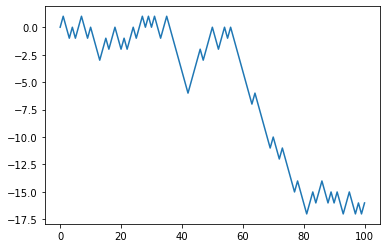

In [27]:
import random

def python_walk(steps, position):
    #primeiro passo
    walk = [position]

    #programando a lógica dos passos seguintes
    for i in range(steps):
        step = 1 if random.randint(0,1) else -1
        position = position + step
        walk.append(position)
    
    return walk

walk = python_walk(100,0)

#plotando
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(walk)

Agora implementarei o mesmo programa usando a **Numpy**:

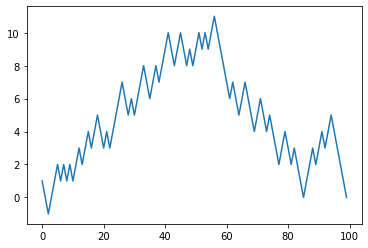

In [28]:
import numpy as np

def numpy_walk(nsteps):

    #cara ou coroa em uma moeda
    draws = np.random.randint(0,2,size=nsteps) #como o intervalo da direita é aberto, colocamos 2 ao invés de 1

    #converte cara para 1 e coroa para -1
    steps = np.where(draws>0,1,-1)

    #o passeio é a soma cumulativa dos passos
    walk = steps.cumsum()
    return walk

walk = numpy_walk(100)

#plotando
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(walk)

Vamos comparar os tempos de execução para 1000 passos:

In [29]:
%time t1 = python_walk(1000,0)
%time t2 = numpy_walk(1000)

Wall time: 3.99 ms
Wall time: 996 µs


Cada vez que rodamos a célula anterior, obtemos um valor diferente. 
Para chegar a uma ordem de grandeza, vamos calcular o tempo de 300 caminhos de 1000 passos. 
Primeiro em Python puro e depois com o Numpy.

In [37]:
#Primeiro em Python puro

def multiple_walks_python(nwalks):
    
    walks = []
    
    for i in range(nwalks):
        walk = python_walk(1000,0)
        walks.append(walk)
    
    return walks

def multiple_walks_numpy(nwalks,nsteps):
    
    #cara ou coroa em uma moeda
    draws = np.random.randint(0,2,size=(nwalks,nsteps)) #como o intervalo da direita é aberto, colocamos 2 ao invés de 1

    #converte cara para 1 e coroa para -1
    steps = np.where(draws>0,1,-1)

    #o passeio é a soma cumulativa dos passos
    walk = steps.cumsum()
    return walk
    
%time py_walks = multiple_walks_python(300)
%time numpy_walks = multiple_walks_numpy(300,1000) 

Wall time: 1.48 s
Wall time: 15.6 ms


Veja, no primeiro caso estamos na ordem de segundos. No segundo, na ordem de milissegundos. Isso prova a eficiência da Numpy =]